# *Identifying the Drivers of Heavy Traffic on I-94*

### Table of content

- [Introduction](#Introduction)
- [Read and analyze data](#Read-and-analyze-data)
- [Analyzing Traffic Volume](#Analyzing-Traffic-Volume)
- [Traffic Volume: Day vs Night](#Traffic-Volume:-Day-vs-Night)
- [Time Indicators](#Time-indicators)
- [Weather Indicators](#Weather-Indicators)
- [Conclusion](#Conclusion)

#### **Introduction**

This project focuses on analyzing westbound traffic data from the I-94 Interstate highway. The dataset, provided by John Hogue and hosted on the __[UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)__, contains information about traffic volume alongside weather conditions, time variables, and holidays whose purpose is to explore which factors are associated with heavy traffic.

The main goal is to identify indicators that contribute to heavy traffic on I-94. These indicators may include factors such as weather conditions, time of day, or day of the week. For example, we may discover that traffic tends to be heavier during rush hours, on weekdays, or under specific weather events like snow. Through this analysis, we aim to uncover patterns that explain traffic congestion and strengthen our ability to draw meaningful insights from data.

#### **Read and analyze data**

In this section, we will read and examine the data set, with the aim of identifying variables that could help us understand the factors that led to the traffic blockage on that route.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Read and examine the dataset
traffic=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


The dataset contains 9 columns that describe different features of each record, such as weather conditions (`temp`, `rain_1h`, `snow_1h`, `clouds_all`), weather descriptions (`weather_main`, `weather_description`), holiday information, the date and time of observation, and the recorded traffic volume.

In [2]:
#Information about dataset
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


From the output above, we can see that data does not contain any variables with missing or less values. The features include both numeric and categorical (object) types, and our analysis will focus primarily on the target variable: `traffic_volume`.

#### **Analyzing Traffic Volume**

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of that station.

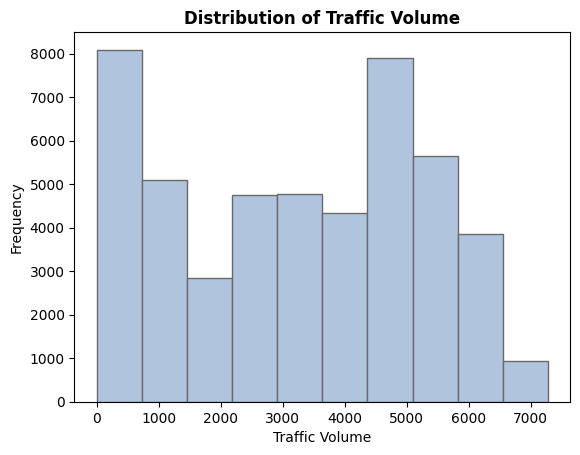

In [3]:
#Distribution of traffic volume
traffic["traffic_volume"].plot.hist(color="lightsteelblue",edgecolor="dimgrey",linewidth=1)
plt.title("Distribution of Traffic Volume",fontweight='bold')
plt.xlabel("Traffic Volume")
plt.show()

In [4]:
#Describe statistics
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Based on the descriptive statistics, the average traffic volume is approximately __3,259 vehicles per hour__, with a minimum of 0 and a maximum of 7,280. The histogram highlights two peaks in frequency: one for very low traffic volumes (up to around 1,000) and another for higher volumes (around 5,000). This suggests that traffic flow on I-94 tends to concentrate either in low-activity periods (e.g., nighttime or holidays) or in high-activity periods (e.g., rush hours). Additionally, there are relatively fewer observations in the mid-range (between 2,000 and 4,000), which indicates that traffic volume is less evenly distributed.

#### **Traffic Volume: Day vs Night**

We observed that about 25% of the time, traffic volume was 1,193 cars per hour or fewer — this most likely corresponds to nighttime periods or situations such as road construction. On the other hand, 75% of the time, traffic volume was 4,933 cars per hour or fewer, while in the remaining 25% of cases traffic volume exceeded this threshold.

These patterns suggest that daytime and nighttime may strongly influence traffic volume, which provides an interesting direction for our analysis. To investigate this, we will divide the dataset into two subsets:

* __Daytime__ : hours from `7 a.m.` to `7 p.m`. (12 hours)
* __Nighttime__ : hours from `7 p.m.` to `7 a.m`. (12 hours)

In [5]:
#Transform date_time column to datetime
traffic["date_time"]=pd.to_datetime(traffic["date_time"])

#Get the hour of each datetime 
traffic['hour']=traffic["date_time"].dt.hour
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13
...,...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22


In [6]:
#Separate the date_time into day and night time
day_time = traffic[traffic["hour"].between(7,18)]
night_time = traffic[(traffic["hour"].between(19,23))|(traffic["hour"].between(0,6))]

#Check the data
print(day_time.head())
print(night_time.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  hour  
0    scattered clouds 2012-10-02 09:00:00            5545     9  
1       broken clouds 2012-10-02 10:00:00            4516    10  
2     overcast clouds 2012-10-02 11:00:00            4767    11  
3     overcast clouds 2012-10-02 12:00:00            5026    12  
4       broken clouds 2012-10-02 13:00:00            4918    13  
   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
10     NaN  290.97      0.0      0.0          20       Clouds   
11     NaN  289.38      0.0      0.0           1        Clear   
12     NaN  288.61      

Now we have two dataset which contains data for the two periods of the day.Next, we will analyze the traffic volume based on the division made previously.

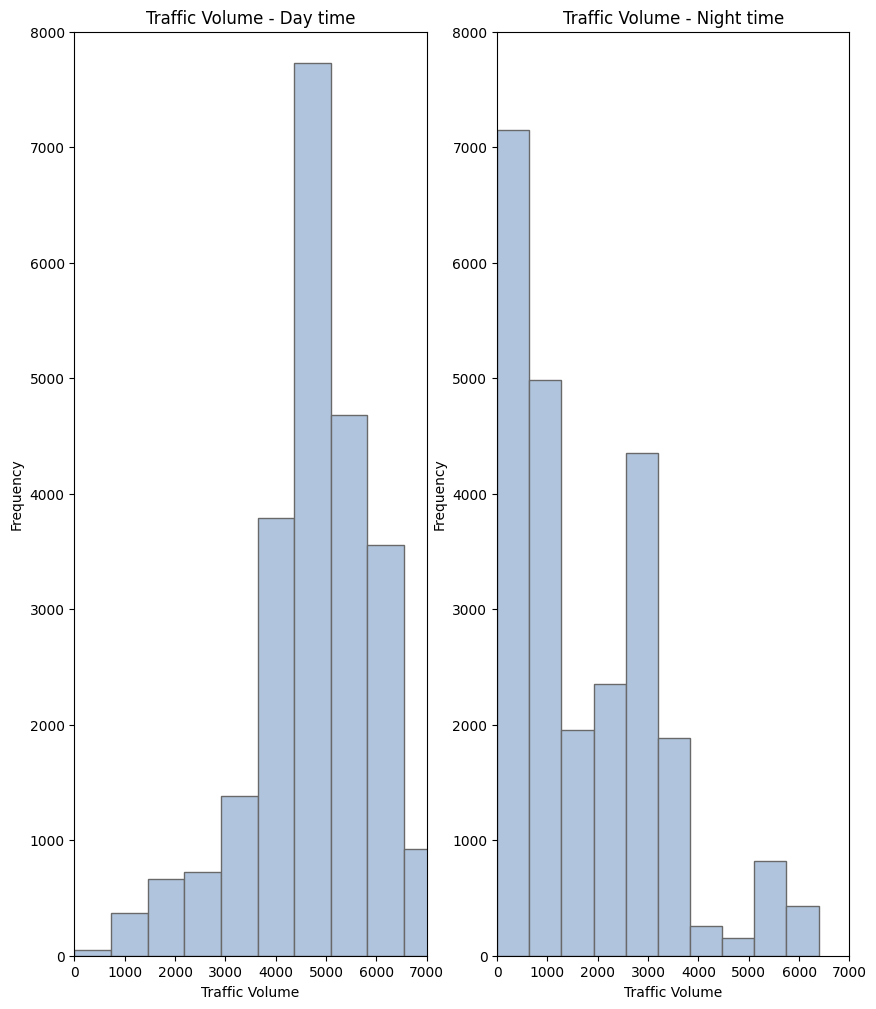

In [7]:
#Comparing histograms for traffic volume

def create_histogram(data_dict):
    plt.figure(figsize=(10,12))
    for i, (label, subset) in enumerate(data_dict.items(), 1):
        plt.subplot(1,2,i)
        plt.hist(subset["traffic_volume"],color="lightsteelblue",edgecolor="dimgrey",linewidth=1)
        plt.title(f"Traffic Volume - {label}")
        plt.xlabel("Traffic Volume")
        plt.ylabel("Frequency")
        plt.xlim(0,7000)
        plt.ylim(0,8000)
    plt.show()
create_histogram({"Day time": day_time, "Night time": night_time})

In [8]:
# Descriptive statistics for day and night time
day_night_stat = pd.concat([
        day_time["traffic_volume"].describe().rename("Traffic Volume-Day"),
        night_time["traffic_volume"].describe().rename("Traffic Volume-Night")
    ],
    axis=1
)
day_night_stat

,Traffic Volume-Day,Traffic Volume-Night
count,23877.000000,24327.000000
mean,4762.047452,1785.377441
std,1174.546482,1441.951197
min,0.000000,0.000000
25%,4252.000000,530.000000
50%,4820.000000,1287.000000
75%,5559.000000,2819.000000
max,7280.000000,6386.000000


- **Daytime traffic**
  - Mean ≈ 4,762 vehicles/hour, Median ≈ 4,820 → values are centered around 5,000.
  - Histogram shows a **left skew (negative asymmetry)**: most values are high, but some lower values pull the tail to the left.
  - Interpretation: daytime traffic is generally heavy and stable, with occasional low-traffic periods (e.g., weekends, early mornings).

- **Nighttime traffic**
  - Mean ≈ 1,785 vehicles/hour, Median ≈ 1,287 → the mean is larger than the median, suggesting a right skew.
  - Histogram shows a **right skew (positive asymmetry)**: most values are low, but a few higher values extend the tail to the right.
  - Interpretation: nighttime traffic is usually light, but there are occasional high-volume periods (e.g., freight traffic or special events).

**Conclusion:**  
Daytime traffic is consistently higher and more concentrated, while nighttime traffic is usually low with occasional spikes. This confirms that the time of day strongly influences traffic volume on I-94.
 Since our main goal is to identify **indicators of heavy traffic**, nighttime data may not be as relevant because traffic is generally light during those hours. While it can be kept for completeness, focusing primarily on **daytime data** will give us more meaningful insights into the conditions that lead to congestion.

#### **Time indicators**

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

#### *Month*

In [9]:
#Create a column for month
day_time = day_time.copy()
day_time["month"]=day_time['date_time'].dt.month


#Group the dataset by the month and aggregate by mean
day_time_month=day_time.groupby('month').mean(numeric_only=True)
day_time_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

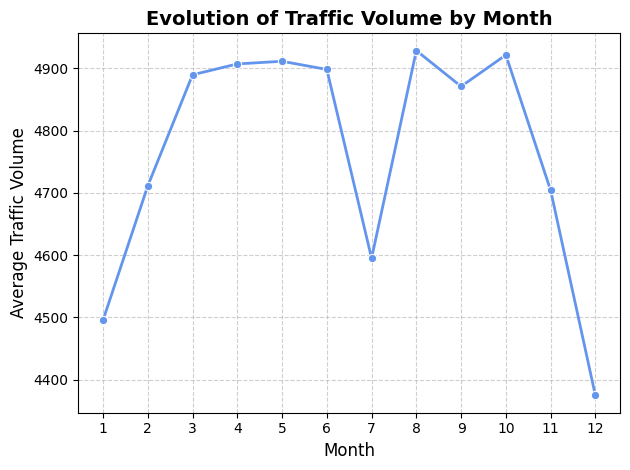

In [10]:
#Generate the line plot
sns.lineplot(
    x=day_time_month.index,
    y=day_time_month['traffic_volume'],
    marker="o",
    color="cornflowerblue",
    linewidth=2
)

plt.title("Evolution of Traffic Volume by Month", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Traffic Volume", fontsize=12)
plt.xticks(range(1,13))   # Month 1–12
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

The analysis of average daytime traffic volume by month shows relatively stable values throughout the year, ranging between roughly 4,300 and 4,900 vehicles per hour. The lowest average is observed in **December (≈ 4,375)**, while the highest is in **August (≈ 4,928)**. Overall, the variation is moderate (about ±600 vehicles/hour), which suggests that traffic on I-94 is fairly consistent across months.

From a seasonal perspective, traffic gradually increases from January to May, dips slightly during June and July, and then reaches its peak in August. September and October maintain high volumes, followed by a decline in November and December. This pattern indicates a mild seasonal effect, with higher activity during the summer months and lower activity in winter. However, the monthly differences are less pronounced compared to the strong variation observed between daytime and nighttime traffic.

#### *Day of the week*

In [11]:
#Create a column for day of the week
day_time = day_time.copy()
day_time['day_of_week'] = day_time['date_time'].dt.dayofweek

#Group the dataset by the day of the week and aggregate by mean
day_time_week = day_time.groupby('day_of_week').mean(numeric_only=True)
day_time_week['traffic_volume']  # 0 is Monday, 6 is Sunday

day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

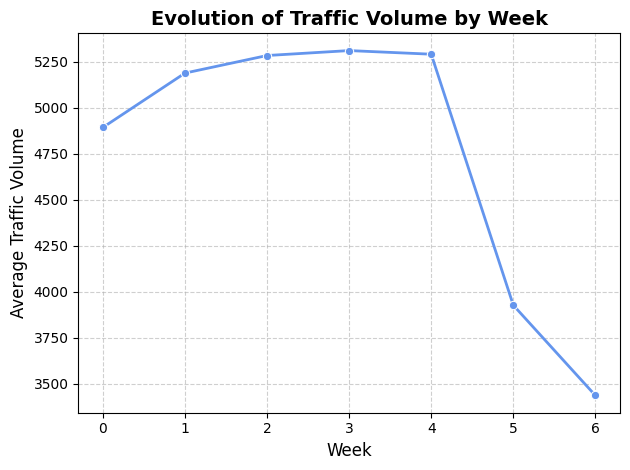

In [12]:
#Generate the line plot
sns.lineplot(
    x=day_time_week.index,
    y=day_time_week['traffic_volume'],
    marker="o",
    color="cornflowerblue",
    linewidth=2
)

plt.title("Evolution of Traffic Volume by Week", fontsize=14, fontweight="bold")
plt.xlabel("Week", fontsize=12)
plt.ylabel("Average Traffic Volume", fontsize=12)
plt.xticks(range(0,7))   # Week 1–7
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

The analysis of average daytime traffic volume by day of the week shows clear differences between weekdays and weekends. Traffic is consistently higher from **Monday to Friday**, averaging between about 4,900 and 5,300 vehicles per hour. The peak occurs on **Thursday (≈ 5,291)**, followed closely by Tuesday and Wednesday. This indicates that weekday traffic is strongly influenced by commuting patterns.

In contrast, traffic volume drops significantly during the weekend. On **Saturday**, the average falls to ≈ 3,927 vehicles per hour, and on **Sunday** it reaches the lowest level of the week at ≈ 3,437. This sharp decline reflects reduced commuting activity and lighter road usage on weekends.  

**Conclusion:** Traffic volume on I-94 is strongly driven by the workweek schedule, with consistently heavy traffic on weekdays and substantially lighter traffic on weekends.

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [13]:
#Create a column for hour
day_time = day_time.copy()
day_time['hour'] = day_time['date_time'].dt.hour

#Separate business days and weekends
business_days = day_time.copy()[day_time['day_of_week'] <= 4] # 4 == Friday
weekend = day_time.copy()[day_time['day_of_week'] >= 5] # 5 == Saturday

#Group each dataset by hour and aggregate by mean
day_business = business_days.groupby('hour').mean(numeric_only=True)
day_weekend = weekend.groupby('hour').mean(numeric_only=True)

#Concatenate data
day_business_week = pd.concat([
        day_business["traffic_volume"].describe().rename("Traffic Volume-Business Days"),
        day_weekend["traffic_volume"].describe().rename("Traffic Volume-Weekend Days")
    ],
    axis=1
)
day_business_week

,Traffic Volume-Business Days,Traffic Volume-Weekend Days
count,12.000000,12.000000
mean,5192.498812,3709.128440
std,615.622781,911.307344
min,4378.419118,1589.365894
25%,4799.891475,3542.880206
50%,5024.132518,4098.037442
75%,5640.880110,4346.478609
max,6189.473647,4372.482883


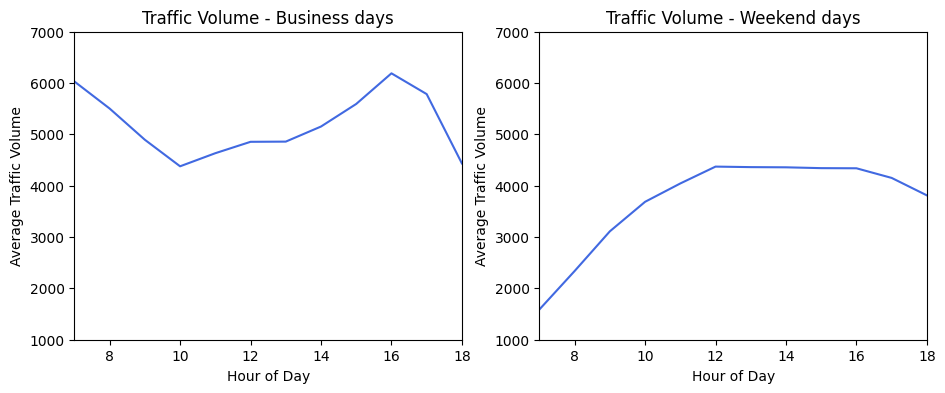

In [14]:
#Create line plots
def create_line(data_dict):
    plt.figure(figsize=(11,4))
    for i, (label, subset) in enumerate(data_dict.items(), 1):
        plt.subplot(1,2,i)
        plt.plot(subset["traffic_volume"],color="royalblue")
        plt.title(f"Traffic Volume - {label}")
        plt.xlabel("Hour of Day")
        plt.ylabel("Average Traffic Volume")
        plt.xlim(7,18)
        plt.ylim(1000,7000)
    plt.show()
create_line({"Business days": day_business, "Weekend days": day_weekend})

### Daytime Traffic: Business Days vs Weekend — How the charts compare

- **Shape & level**
  - **Business days:** Clear **bimodal** pattern (two peaks) with **higher overall level** (mean ≈ **5,192**; median ≈ **5,024**). Variation is tighter (std ≈ **616**).
  - **Weekend:** **Unimodal / midday plateau** with **lower overall level** (mean ≈ **3,709**; median ≈ **4,098**). More relative fluctuation (std ≈ **911**) around a lower baseline.

- **Hourly pattern**
  - **Business days:** High at **~07–09**, dip late morning/noon, then a second (and strongest) peak at **~16–17**, followed by a decline toward 18.
  - **Weekend:** Gradual rise from morning, **broad maximum ~11–15**, then easing later afternoon; no sharp commute spikes.

- **Magnitude**
  - **Business-day peaks** reach **~6,000–6,200 vehicles/hour** (rush hours).
  - **Weekend peaks** are much lower, topping out around **~4,300–4,400 vehicles/hour**.

### When are the rush hours on business days?

- **Morning rush:** **~07:00–09:00**
- **Evening rush:** **~16:00–17:00** (typically the strongest)

### Summary: time indicators of heavy traffic (from all time-based analyses)

- **Day vs Night:** Daytime >> Nighttime (night has right-skewed, mostly low volumes).
- **Weekday vs Weekend:** Weekdays >> Weekends (≈ **+40%** higher mean on business days).
- **Within weekday (day of week):** Highest on **Tue–Thu** (Thu peaks ≈ **5,291**), Monday lower, weekend lowest (Sun ≈ **3,437**).
- **Within day (hourly):** Clear commute spikes **07–09** and **16–17** on business days; weekends show a flatter midday hump.
- **Seasonality (months):** Mild; **August** highest (4,928), **December** lowest (~4,375) during daytime, but differences by month are smaller than the day/night and weekday/weekend effects.

The strongest time-based indicators of heavy traffic on I-94 are **(1) being a weekday** and **(2) being in rush-hour windows (07–09, 16–17)**. 

#### **Weather Indicators**

So far, we've focused on finding time indicators for heavy traffic.
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`. Some of the variables are numerical, so we will check the correlation with the `traffic volume`.
We will:
1) compute correlations between `traffic_volume` and the **numeric** weather variables (`temp`, `rain_1h`, `snow_1h`, `clouds_all`);
2) analyze the **categorical** weather variables (`weather_main`, `weather_description`) by comparing average traffic volume across weather types and visualizing their distributions.

In [15]:
#Correlation between traffic_volume and the numerical weather columns
day_time[["traffic_volume","temp","rain_1h","snow_1h","clouds_all"]].corr()["traffic_volume"]

traffic_volume    1.000000
temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
Name: traffic_volume, dtype: float64

The strongest correlation is between `traffic_volume` and **temperature** at **r = 0.128**, which is **very weak**.All other weather variables show even smaller correlations. This indicates that, compared to time-based factors (hour of day, weekday vs weekend), **weather has only a minor linear association** with traffic volume in this dataset.

**What this implies**
- Temperature: weak positive effect — traffic tends to be slightly higher when it’s warmer, but the effect is small.
- Precipitation (`rain_1h`, `snow_1h`): near-zero correlations likely due to **zero inflation** (most hours have no rain/snow) and non-linear effects.
- Cloud cover (`clouds_all`): also negligible in linear terms.

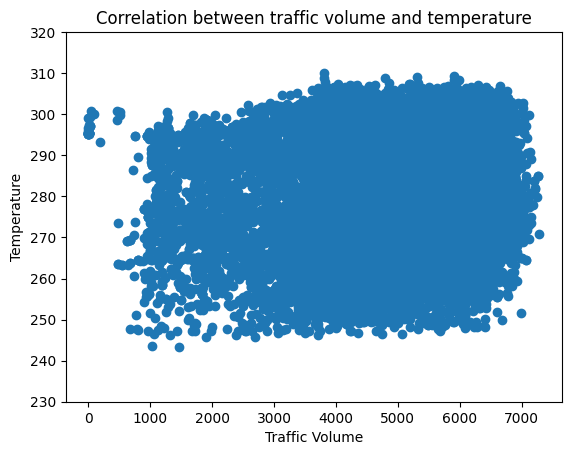

In [16]:
#Line Plot
plt.scatter(day_time["traffic_volume"],day_time["temp"])
plt.title("Correlation between traffic volume and temperature")
plt.xlabel("Traffic Volume")
plt.ylabel("Temperature")
plt.ylim(230, 320) #there are 2 values of 0 which mess up the axis
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

#### **Weather Types**

In [17]:
#Group the data by weather main and weather description
by_weather_main = day_time.groupby('weather_main').mean(numeric_only=True)
by_weather_description = day_time.groupby('weather_description').mean(numeric_only=True)

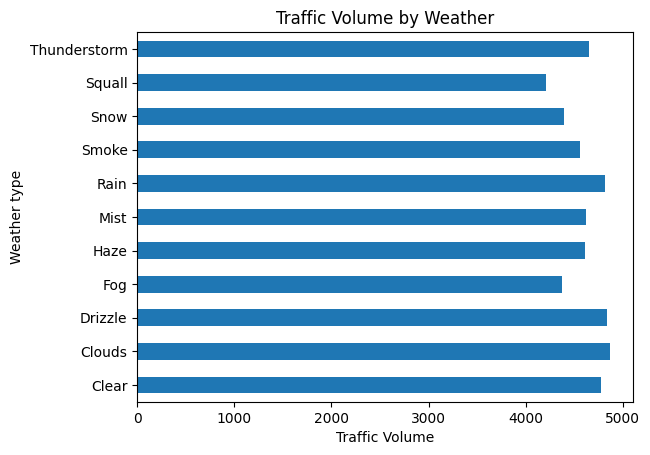

In [18]:
#Generale a gorizontal bar
by_weather_main["traffic_volume"].plot.barh()
plt.title("Traffic Volume by Weather")
plt.ylabel("Weather type")
plt.xlabel("Traffic Volume")
plt.show()

The bar plot shows that none of the weather categories exceed 5,000 vehicles per hour; the highest values sit just under that mark. Average traffic differs only slightly across weather types (roughly 4.3k–4.9k). Conditions like rain, clouds, thunderstorms, and drizzle are marginally higher, while fog, squall, and snow tend to be lower, but the gaps are small (generally under ~10–15%). Given these modest differences—and the fact that some conditions are rare—weather_main is not a reliable indicator of heavy traffic.

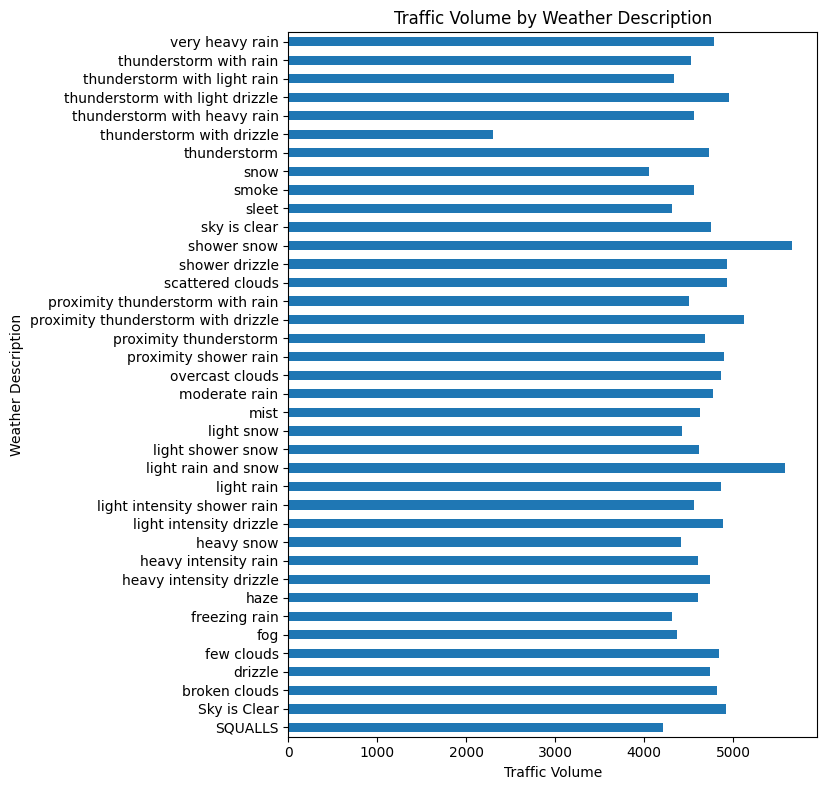

In [19]:
#Generale a gorizontal bar
plt.figure(figsize=(8,8))
by_weather_description["traffic_volume"].plot.barh()
plt.title("Traffic Volume by Weather Description")
plt.xlabel("Traffic Volume")
plt.ylabel("Weather Description")
plt.tight_layout()
plt.subplots_adjust(left=0.32)
plt.show()

**Weather description and heavy traffic**

In our chart, the only descriptions with an average traffic volume above **5,000** vehicles/hour are:
**shower snow**, **light rain and snow**, and **proximity thunderstorm with drizzle**. This could reflect a behavioral shift in bad weather—people are more likely to drive instead of walking or cycling.

However, these differences are **small** (typically < ~10% vs. other conditions) and some of these weather types are **rare**, so their averages may be quite big. Time effects (hour of day, weekday vs. weekend) remain much stronger drivers of heavy traffic. Therefore, these weather descriptions are **not strong standalone indicators**; they add, at best, a minor signal on top of time-based factors.  

### **Conclusion**

In this project, we set out to identify indicators of heavy traffic on the I-94 Interstate. Our findings point to **time-based factors** as the dominant drivers, while **weather** adds only a minor signal.

**Time indicators (strong effects)**
- **Day vs. night:** Daytime traffic is much higher than nighttime traffic.
- **Weekday vs. weekend:** Traffic is consistently higher on **business days** than on weekends.
- **Rush hours on business days:** Clear peaks around **07:00–09:00** and **16:00–17:00**.
- **Seasonality (months):** A mild pattern—**warmer months (roughly Mar–Oct)** show somewhat higher volumes than **cold months (Nov–Feb)**, but the month-to-month differences are smaller than the effects above.

**Weather indicators (weak effects)**
- A few weather descriptions (e.g., **shower snow**, **light rain and snow**, **proximity thunderstorm with drizzle**) show averages slightly above **5,000 vehicles/hour**.
- However, these differences are **small** and some conditions are **rare**, so they are not reliable standalone indicators compared with time-of-day and weekday effects.